In [1]:
import numpy as np, seaborn as sns ,pandas as pd

In [2]:
?sns.load_dataset

In [3]:
data = pd.read_csv('tips')

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [6]:
data.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

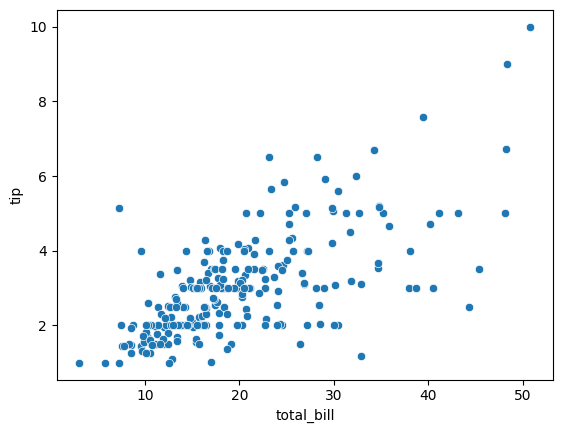

In [11]:
sns.scatterplot(data = data,x='total_bill',y='tip')

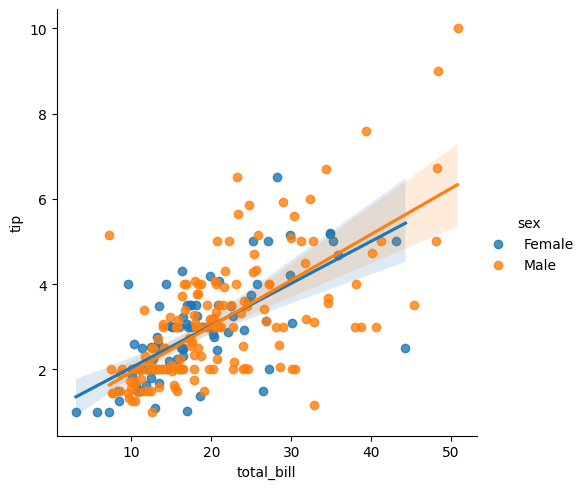

In [13]:
sns.lmplot(data = data,x='total_bill',y='tip',hue='sex')

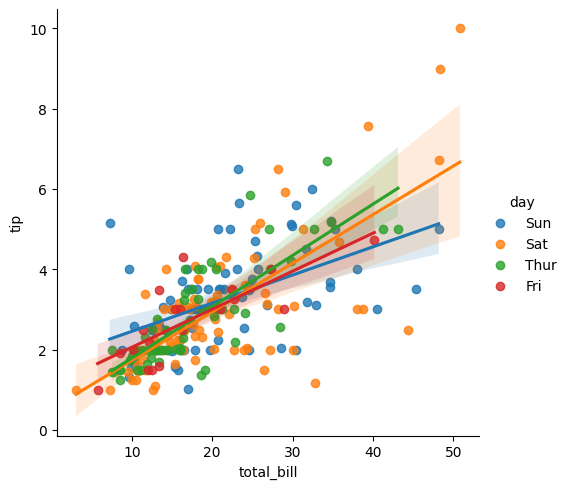

In [14]:
sns.lmplot(data = data,x='total_bill',y='tip',hue='day')

## Korelasyonun testi

Görüldüğü gibi grafikler yardımı ile toplam ödenen hesap ile verilen bahşiş arasında bir korelasyon olduğunu gözlemledik. Bunu test etmeliyiz.

    Varsayımlar : Normallik ve n > 30
   

### Normallik Testi

<AxesSubplot: xlabel='tip', ylabel='Count'>

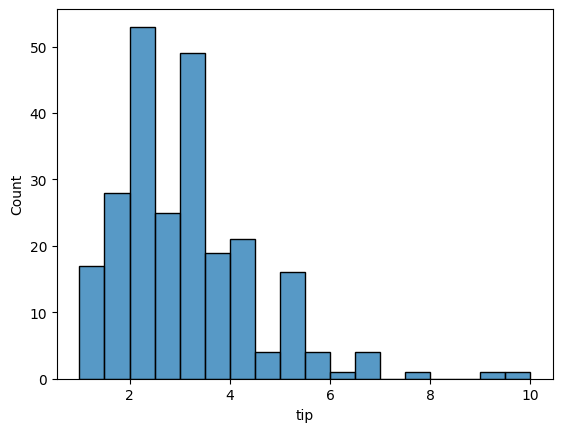

In [19]:
#histogram
sns.histplot(data=data,x='tip')

In [21]:
#Shapiro-wiks
import scipy.stats as stats
[stats.shapiro(data['tip']),stats.shapiro(data['total_bill'])]

[ShapiroResult(statistic=0.8978114128112793, pvalue=8.200817629144819e-12),
 ShapiroResult(statistic=0.9197186231613159, pvalue=3.3244529351605934e-10)]

<b>iki p valueda kucuk bu sebeple normallik saglanmadi varsayimlar kabul edilmedi bu sebeple nonparametrik yonteme gecis yapiyoruz 

In [29]:
stats.spearmanr(data['tip'],data['total_bill'])

SignificanceResult(statistic=0.6789681219001009, pvalue=2.501158440923619e-34)

<b> Aralarinda anlamli bir korelasyonu %95 olarak garantiledik

## Varsayımlar sağlansaydı !!

In [30]:
from scipy.stats import pearsonr
pearsonr(data['tip'],data['total_bill'])

PearsonRResult(statistic=0.6757341092113647, pvalue=6.69247064686336e-34)

<b> Aralarinda anlamli bir korelasyonu %95 olarak garantiledik

## Peki korelasyonun gücü ?

In [33]:
data['tip'].corr(data['total_bill'],method="spearman")

0.6789681219001009

<b> %68 e yakin bir korelasyon var ve bundan %95 bilimsellikle eminiz